<a href="https://colab.research.google.com/github/Saba-Gul/Generating-Recipes-from-Food-Images-Using-LangChain-and-OpenAI/blob/main/Cooking_With_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Installation**

In [1]:
!pip install datasets huggingface_hub -q
!pip install -q -U transformers
!pip install -q bitsandbytes==0.41.3 accelerate==0.25.0
!pip install langchain -q
!pip install openai langchain_openai -q
!pip install typing_extensions

In [26]:
!pip install pyttsx3 # library for coverting text to speech

In [30]:
!pip install gtts


In [4]:
from google.colab import userdata
OPENAI_API_KEY=userdata.get('OPENAI_API_KEY')

## **Login to Huggingface**

In [6]:
from huggingface_hub import login
login()

## **Get the image of the food you want to cook**

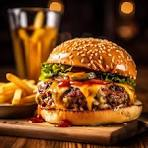

In [7]:
import requests
from PIL import Image
image_url="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR3ZKlfd82ogR-0YWf882ZQMQDp9dxDb9KszkCpA2WRFw&s"
image = Image.open(requests.get(image_url, stream=True).raw)
image

## **Using The AI Model**

In [8]:
from transformers import pipeline
captioner= pipeline("image-to-text", model ="Salesforce/blip-image-captioning-base")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [9]:
results = captioner(image_url)
print(results[0]['generated_text'])

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1259: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


a cheeseburg burger with a side of fries


## **Using Langchain to access OpenAI**

In [10]:
from langchain_openai import OpenAI

In [22]:
llm = OpenAI(temperature=0,max_tokens=512, openai_api_key=OPENAI_API_KEY)

In [52]:
llm=OpenAI(model_name="gpt-3.5-turbo-1106",temperature=0,max_tokens=512, openai_api_key='OPENAI_API_KEY')

In [23]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

template= """Question: {question}
Answer: Lets think step by step,"""

prompt = PromptTemplate(template=template, input_variables=["question"])

llm_chain = LLMChain(prompt=prompt, llm=llm)

In [24]:
question= f"give me the list of ingredients and a step by step recipie for {results[0]['generated_text']}"

openai_results = llm_chain.invoke(question)

print(openai_results['text'])

 first we will list the ingredients for the cheeseburger and then for the fries.

Ingredients for Cheeseburger:
- 1 lb ground beef
- 4 slices of cheese (cheddar or American)
- 4 hamburger buns
- 1 onion, sliced
- 4 lettuce leaves
- 4 tomato slices
- 4 pickle slices
- Salt and pepper
- Ketchup, mustard, and mayonnaise (optional)

Ingredients for Fries:
- 4 large potatoes
- Vegetable oil
- Salt
- Garlic powder (optional)
- Paprika (optional)

Step by Step Recipe:

1. Preheat your grill or grill pan to medium-high heat.
2. In a large bowl, season the ground beef with salt and pepper. Mix well.
3. Divide the beef into 4 equal portions and shape them into patties.
4. Place the patties on the grill and cook for about 4-5 minutes on each side, or until desired level of doneness.
5. In the last minute of cooking, place a slice of cheese on top of each patty and let it melt.
6. While the burgers are cooking, prepare the buns by toasting them on the grill for about 1-2 minutes.
7. Assemble the b

In [32]:
recipe_text=openai_results['text']

In [33]:
from gtts import gTTS
import os

def text_to_speech(text, filename='recipe_audio.mp3'):
    tts = gTTS(text=text, lang='en')
    tts.save(filename)
    print(f"Audio saved as {filename}")

text_to_speech(recipe_text)


Audio saved as recipe_audio.mp3
